In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
weather = pd.read_csv("weather.csv", index_col = "DATE")


In [8]:
weather

,STATION,NAME,AWND,DAPR,MDPR,PGTM,PRCP,SN52,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,US1SCYR0029,"ROCK HILL 5.8 WNW, SC US",NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,US1SCYR0029,"ROCK HILL 5.8 WNW, SC US",NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,US1SCYR0029,"ROCK HILL 5.8 WNW, SC US",NaN,NaN,NaN,NaN,0.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,US1SCYR0029,"ROCK HILL 5.8 WNW, SC US",NaN,NaN,NaN,NaN,0.26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,US1SCYR0029,"ROCK HILL 5.8 WNW, SC US",NaN,NaN,NaN,NaN,1.06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,US1NCRW0002,"CHINA GROVE 4.4 W, NC US",NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-13,US1NCRW0002,"CHINA GROVE 4.4 W, NC US",NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-14,US1NCRW0002,"CHINA GROVE 4.4 W, NC US",NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [14]:
weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [24]:
weather.apply(pd.isnull).sum() / weather.shape[0]

precip        0.000000
snow          0.003206
snow_depth    0.024142
temp_max      0.051396
temp_min      0.051396
dtype: float64

In [21]:
weather["precip"].value_counts()

0.00    62680
0.01     2170
0.02     2057
0.03     1464
0.05     1071
        ...  
4.30        1
3.98        1
3.48        1
3.27        1
3.92        1
Name: precip, Length: 357, dtype: int64

In [17]:
weather["precip"] = weather["precip"].fillna(0)

In [22]:
weather = weather.fillna(method="ffill")

In [27]:
weather["snow_depth"] = weather["snow_depth"].fillna(0)

In [31]:
weather = weather.fillna(method="bfill")

In [33]:
weather.apply(pd.isnull).sum() / weather.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [34]:
weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [35]:
weather.index

Index(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
       ...
       '2022-04-19', '2022-04-27', '2022-05-04', '2022-05-05', '2022-05-07',
       '2022-05-08', '2022-05-13', '2022-05-14', '2022-05-16', '2022-06-29'],
      dtype='object', name='DATE', length=94813)

In [36]:
weather.index = pd.to_datetime(weather.index)

In [37]:
weather.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-04-19', '2022-04-27', '2022-05-04', '2022-05-05',
               '2022-05-07', '2022-05-08', '2022-05-13', '2022-05-14',
               '2022-05-16', '2022-06-29'],
              dtype='datetime64[ns]', name='DATE', length=94813, freq=None)

In [39]:
weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

<AxesSubplot:xlabel='DATE'>

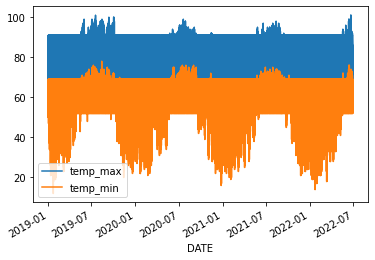

In [41]:
weather[["temp_max", "temp_min"]].plot()

In [44]:
weather["target"] = weather.shift(-1)["temp_max"]

In [46]:
weather.drop(weather.tail(1).index, inplace=True)

In [42]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [43]:
predictors = ["precip", "temp_max", "temp_min"]

In [49]:
weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
2019-01-01,0.07,0.0,0.0,67.0,52.0,67.0
2019-01-02,0.00,0.0,0.0,67.0,52.0,67.0
2019-01-03,0.60,0.0,0.0,67.0,52.0,67.0
2019-01-04,0.26,0.0,0.0,67.0,52.0,67.0
2019-01-05,1.06,0.0,0.0,67.0,52.0,67.0
...,...,...,...,...,...,...
2022-05-07,0.03,0.5,2.0,86.0,67.0,86.0
2022-05-08,0.11,0.5,2.0,86.0,67.0,86.0
2022-05-13,0.14,0.5,2.0,86.0,67.0,86.0


In [50]:
train = weather.loc[:"2021-04-30"]

In [51]:
test = weather.loc["2021-05-01":]

In [52]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [53]:
predictions = reg.predict(test[predictors])

In [54]:
from sklearn.metrics import mean_absolute_error


In [55]:
mean_absolute_error(test["target"], predictions)

1.0227708729406098

In [56]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)

In [57]:
combined.columns = ["actual", "predictions"]

<AxesSubplot:xlabel='DATE'>

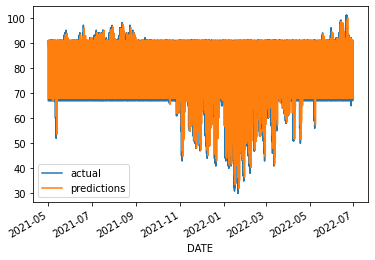

In [59]:
combined.plot()

In [60]:
def create_predictions(predictors, weather, reg):
    train = weather.loc[:"2021-04-30"]
    test = weather.loc["2021-05-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [62]:
weather["month_max"] = weather["temp_max"].rolling(30).mean()

In [64]:
weather.drop(weather.head(30).index, inplace=True)

In [66]:
weather.columns

Index(['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min', 'target',
       'month_max'],
      dtype='object')

In [71]:
weather = weather.rename(columns={"month_max": "month_mean"})

In [72]:
weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_mean
DATE,,,,,,,
2019-02-06,0.00,0.0,0.0,67.0,52.0,67.0,67.0
2019-02-07,0.00,0.0,0.0,67.0,52.0,67.0,67.0
2019-02-08,0.00,0.0,0.0,67.0,52.0,67.0,67.0
2019-02-09,0.00,0.0,0.0,67.0,52.0,67.0,67.0
2019-02-10,0.00,0.0,0.0,67.0,52.0,67.0,67.0
...,...,...,...,...,...,...,...
2022-05-07,0.03,0.5,2.0,86.0,67.0,86.0,86.0
2022-05-08,0.11,0.5,2.0,86.0,67.0,86.0,86.0
2022-05-13,0.14,0.5,2.0,86.0,67.0,86.0,86.0


In [73]:
weather["mean_v_max"] = weather["month_mean"] / weather["temp_max"]

In [75]:
weather["max_min"] = weather["temp_max"] / weather["temp_min"]

In [77]:
weather


,precip,snow,snow_depth,temp_max,temp_min,target,month_mean,mean_v_max,max_min
DATE,,,,,,,,,
2019-02-06,0.00,0.0,0.0,67.0,52.0,67.0,67.0,1.0,1.288462
2019-02-07,0.00,0.0,0.0,67.0,52.0,67.0,67.0,1.0,1.288462
2019-02-08,0.00,0.0,0.0,67.0,52.0,67.0,67.0,1.0,1.288462
2019-02-09,0.00,0.0,0.0,67.0,52.0,67.0,67.0,1.0,1.288462
2019-02-10,0.00,0.0,0.0,67.0,52.0,67.0,67.0,1.0,1.288462
...,...,...,...,...,...,...,...,...,...
2022-05-07,0.03,0.5,2.0,86.0,67.0,86.0,86.0,1.0,1.283582
2022-05-08,0.11,0.5,2.0,86.0,67.0,86.0,86.0,1.0,1.283582
2022-05-13,0.14,0.5,2.0,86.0,67.0,86.0,86.0,1.0,1.283582


In [78]:
predictors = ["precip", "snow", "snow_depth", "month_mean", "mean_v_max", "max_min"]

In [79]:
create_predictions(predictors, weather, reg)

(0.8438022277915332,
             actual  predictions
 DATE                           
 2021-05-01    67.0    67.905723
 2021-05-02    67.0    67.905723
 2021-05-03    67.0    67.905723
 2021-05-04    67.0    67.877038
 2021-05-05    67.0    67.804570
 ...            ...          ...
 2022-05-07    86.0    86.356227
 2022-05-08    86.0    86.344149
 2022-05-13    86.0    86.339619
 2022-05-14    86.0    86.345658
 2022-05-16    86.0    86.344149
 
 [31288 rows x 2 columns])

In [102]:
reg.coef_

array([ -0.1509736 ,   0.17123496,   0.06761493,   0.95933138,
       -37.97407186,  -1.41199461])

In [103]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [104]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-04-18,50.0,75.741991,25.741991
2022-06-28,65.0,90.428156,25.428156
2022-02-12,47.0,72.315637,25.315637
2022-04-18,54.0,77.789212,23.789212
2022-04-17,56.0,79.332856,23.332856
